<a href="https://colab.research.google.com/github/FatoniRahmat/Data-Analyst-in-Python/blob/main/Stroke_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
#Import dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1BvStgo90bb2HN9w5SfFILKm6_iIR4kaxlV0c6pZ9G6s/edit#gid=1206626935'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Missing Value

In [3]:
#check missing value
nan_data = df[df.isna().any(axis=1)]
nan_data

#drop missing value
df = df.dropna()


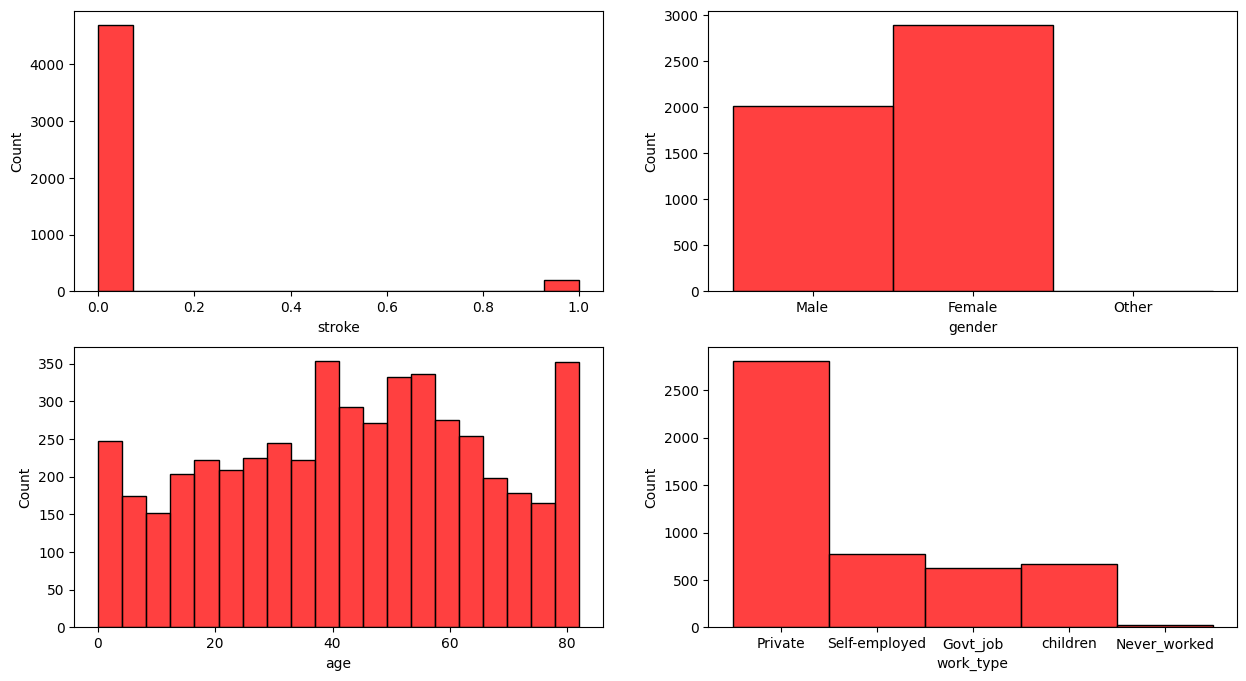

In [4]:
#visualisasi data
fig,axes =plt.subplots(2,2,figsize=(15,8))
sns.histplot(data=df, x='stroke', ax=axes[0,0], color='red')
sns.histplot(data=df, x='gender', ax=axes[0,1], color='red')
sns.histplot(data=df, x='age', ax=axes[1,0], color='red')
sns.histplot(data=df, x='work_type', ax=axes[1,1], color='red')
plt.show()

#Drop Data

In [5]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [6]:
#transformasi (encoding)
df['gender'] = encode.fit_transform(df['gender'].values)
df['ever_married'] = encode.fit_transform(df['ever_married'].values)
df['work_type'] = encode.fit_transform(df['work_type'].values)
df['Residence_type'] = encode.fit_transform(df['Residence_type'].values)
df['smoking_status'] = encode.fit_transform(df['smoking_status'].values)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [7]:
#drop atribut id
df = df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [10]:
#within gender there are other data
print(len(df[df['gender']==1]))
print(len(df[df['gender']==0]))

2011
2897


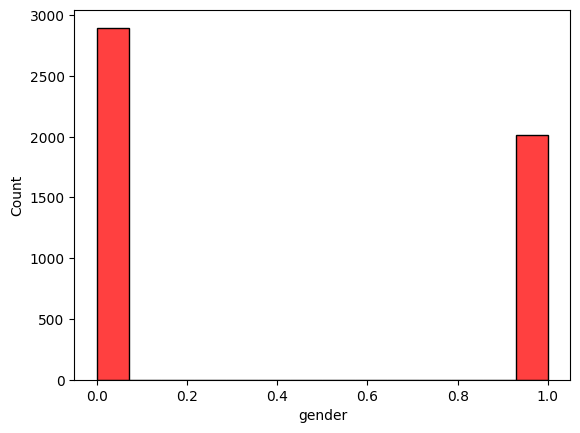

In [11]:
#drop gender other (0 = female, 1 = male)
df[df['gender']>1]
df.drop(df.index[df['gender']>1], inplace=True)
sns.histplot(data=df, x='gender', color='red')
plt.show()

# Imbalance Data

In [12]:
#stroke have imbalance data
#over sampling whit SMOTE
from imblearn.over_sampling import SMOTE

In [13]:
#x is an attribute that affects the stroke
#y is the label itself
x = df.drop(['stroke'], axis=1)
y = df['stroke']

In [14]:
#before SMOTE
print(x.shape)
print(y.shape)

(4908, 10)
(4908,)


In [15]:
#sampling SMOTE
sm = SMOTE(random_state = 30)
x_sampling, y_sampling = sm.fit_resample(x,y)
print(x_sampling.shape)
print(y_sampling.shape)

(9398, 10)
(9398,)


<function matplotlib.pyplot.show(close=None, block=None)>

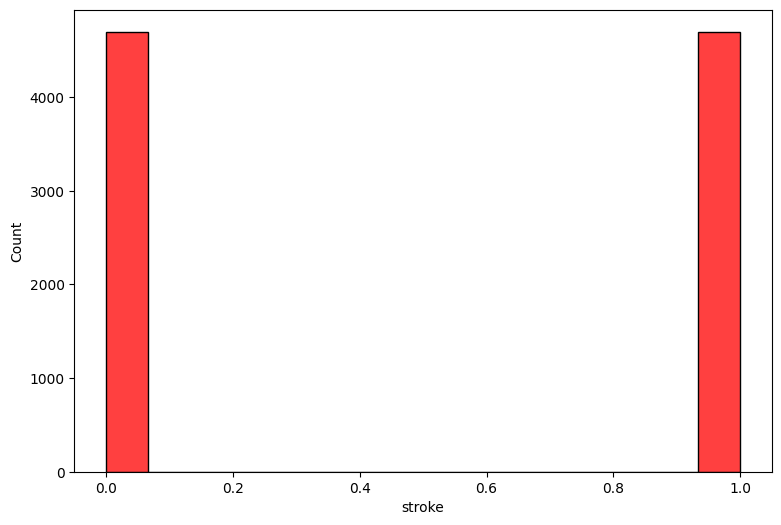

In [16]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling, color='red')
plt.show

#Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler
kolom = [col for col in df.columns]
skala = MinMaxScaler()
scaled = skala.fit_transform(df[kolom])
df_scaled = pd.DataFrame(scaled,columns=kolom)
df_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333,1.0
1,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667,1.0
2,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000,1.0
3,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667,1.0
4,1.0,0.987793,0.0,0.0,1.0,0.50,1.0,0.605161,0.214204,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,0.157715,0.0,0.0,0.0,1.00,0.0,0.221402,0.095074,0.000000,0.0
4904,0.0,0.987793,0.0,0.0,1.0,0.75,1.0,0.323516,0.340206,0.666667,0.0
4905,0.0,0.426270,0.0,0.0,1.0,0.75,0.0,0.128658,0.232532,0.666667,0.0
4906,1.0,0.621582,0.0,0.0,1.0,0.50,0.0,0.513203,0.175258,0.333333,0.0
